Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [243]:
#importing libraries for pandas and numpy
import pandas as pd
import numpy as np

#importing library to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [244]:
#imputing csv file as dataframe

data=pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [245]:
#checking shape of the dataset

data.shape

(614, 13)

In [246]:
#column names in dataset

data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Checking for duplicate values in dataset.**

In [247]:
data.duplicated().sum()

0

In [248]:
#checking for null values in dataset

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [249]:
#checking for unique values in Gender column

data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [250]:
#checking for mode value in Gender column

data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [251]:
#checking for unique values in Married column

data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [252]:
#checking for mode value in Married column

data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [253]:
#checking for unique values in Dependents column

data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [254]:
#checking for mode value in Dependents column

data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [255]:
#checking for unique values in Self_Employed column

data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [256]:
#checking for mode value in Self_Employed column

data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [257]:
#checking for unique values in LoanAmount column

data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [258]:
#checking for mode value in LoanAmount column

data['LoanAmount'].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [259]:
#checking for unique values in Loan_Amount_Term column

data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [260]:
#checking for mode value in Loan_Amount_Term column

data['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [261]:
#checking for unique values in Credit_History column

data['Credit_History'].unique()

array([ 1.,  0., nan])

In [262]:
#checking for mode value in Credit_History column

data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

**Since the data in columns are not float values hence not using mean, as using mean to fill NaN values ends up getting float values.**

- **Filling NaN values with either mode and/or median.**


In [263]:
#Using median for this columns


data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)


In [264]:
#using mode for this columns i.e. using most common value in that column


data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [265]:
#checking for null values after inputing mode values 

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [266]:
#printing dataframe afer inputing NaN values

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [267]:
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [268]:
len(data['Loan_ID'].unique())

614

- It seems that Loan_ID is the serial number provided to each loan application and this number matches with the total number of rows(applications) provided. Hence this column will be dropped as it has no use in developing model.

In [269]:
#dropping Loan_ID column

data=data.drop(['Loan_ID'],axis=1)

In [270]:
#checking dataset shape after dropping column

data.shape

(614, 12)

Now the dataset has 12 column as one column was dropped

<AxesSubplot:xlabel='Gender', ylabel='count'>

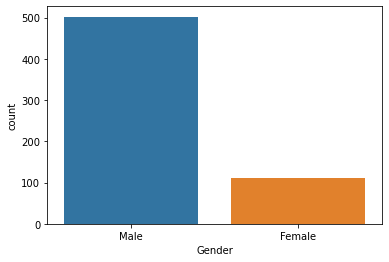

In [271]:
sns.countplot(data['Gender'])

It can be seen that there are more number of males who have applied for loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

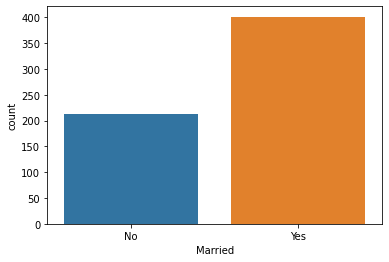

In [30]:
sns.countplot(data['Married'])

- Most person who have applied for loan are married as seen in above plot.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

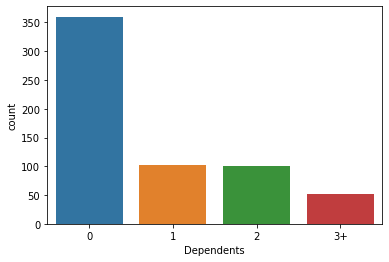

In [31]:
sns.countplot(data['Dependents'])

- The most number of loan applicants does not have any dependents on them while almost 50 people have 3 and more dependents on them.

<AxesSubplot:xlabel='Education', ylabel='count'>

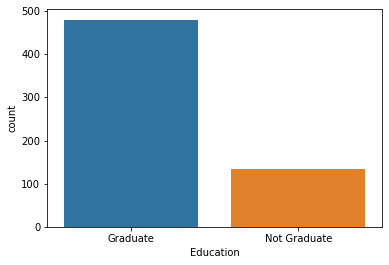

In [32]:
sns.countplot(data['Education'])

- Most of the loan applicants are graduates as seen in above plot.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

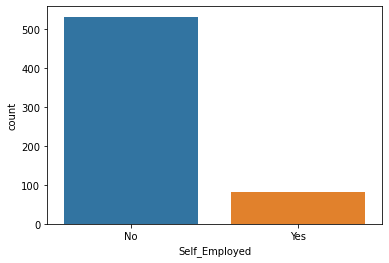

In [33]:
sns.countplot(data['Self_Employed'])

- Very less number of applicants are self employed while most applicants are employees of some companies.

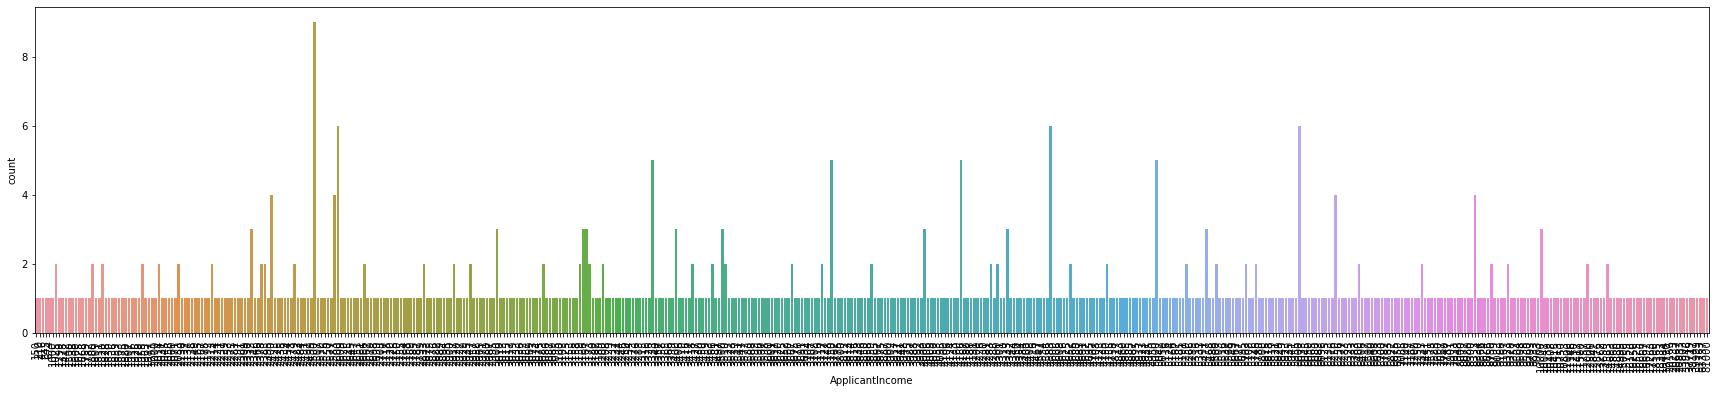

In [35]:
plt.figure(figsize=(30,6))
sns.countplot(data['ApplicantIncome'])
plt.xticks(rotation='vertical')
plt.show()

- The above plot shows the count of loan applicants salaries.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

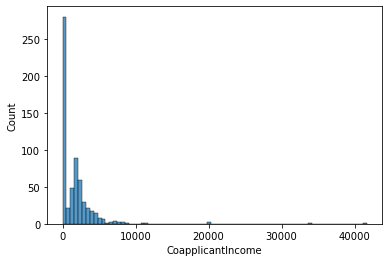

In [65]:
sns.histplot(data['CoapplicantIncome'])

It can be seen from above plot that most co-applicants income is 0.

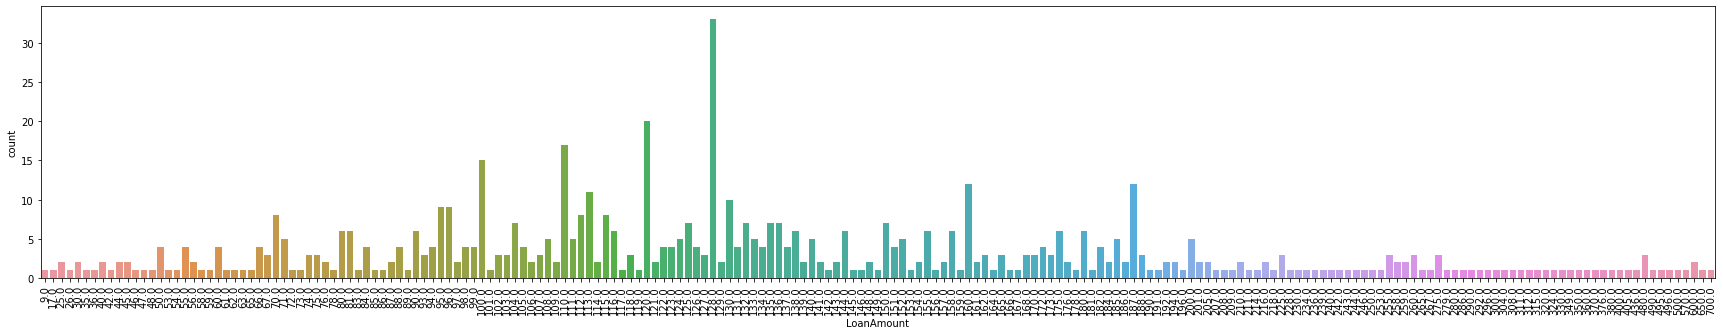

In [38]:
plt.figure(figsize=(30,5))
sns.countplot(data['LoanAmount'])
plt.xticks(rotation='vertical')
plt.show()


the countplot shows the Loan amount of Loan applicants.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

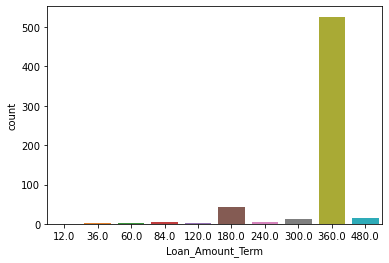

In [76]:
sns.countplot(data['Loan_Amount_Term'])

-Most of the applicants has loan repayment term of 360 months or years.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

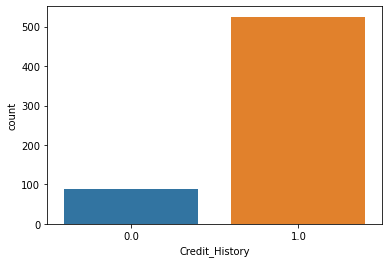

In [77]:
sns.countplot(data['Credit_History'])

- Most loan applicants have credit history.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

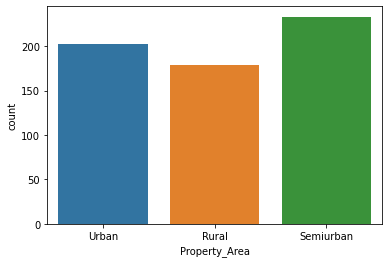

In [78]:
sns.countplot(data['Property_Area'])

 - Most of the applicants has the property area in Semiurban locality while least property area is from Rural locality.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

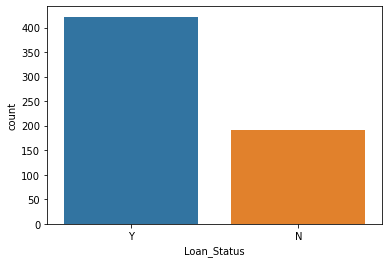

In [80]:
sns.countplot(data['Loan_Status'])

- It can be seen that >400 loan applicants has the chances of getting their loan approved.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

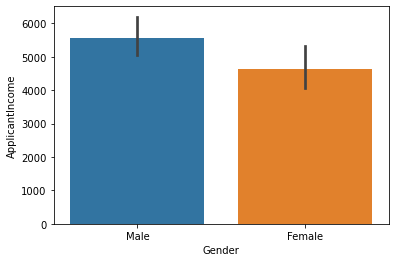

In [43]:
sns.barplot(x='Gender',y='ApplicantIncome',data=data)

- It can be seen that Male applicants income is more then female ones.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

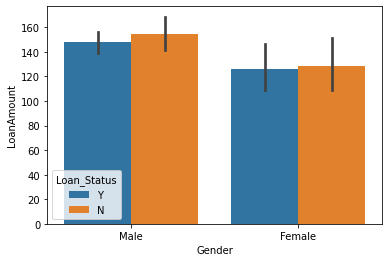

In [46]:
sns.barplot(x='Gender',y='LoanAmount',data=data,hue='Loan_Status')

- It can be seen that Loans for Males with less loan amount will be accepted while there is not difference with respect to loan sanctioning incase of females.

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

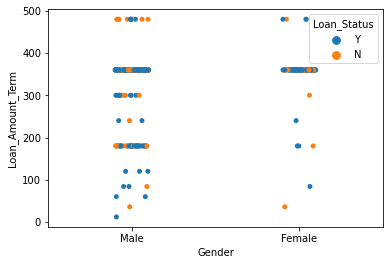

In [57]:
sns.stripplot(x='Gender',y='Loan_Amount_Term',data=data,hue='Loan_Status')

In [88]:
data.groupby('Loan_Status')[['Gender','Married']].value_counts()

Loan_Status  Gender  Married
N            Male    Yes        105
                     No          50
             Female  No          29
                     Yes          8
Y            Male    Yes        264
                     No          83
             Female  No          51
                     Yes         24
dtype: int64

<AxesSubplot:xlabel='Loan_Status,Gender,Married'>

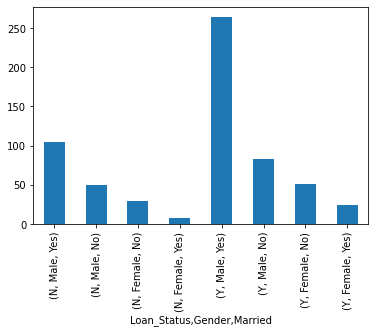

In [89]:
data.groupby('Loan_Status')[['Gender','Married']].value_counts().plot.bar()


-Above data and plot shows that most of married males has their loans approved while less number of married females has their loans approved.


<AxesSubplot:xlabel='Loan_Status,Gender,Dependents'>

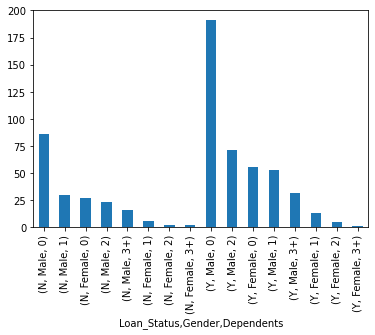

In [90]:
data.groupby('Loan_Status')[['Gender','Dependents']].value_counts().plot.bar()

- highest number of males have their loans approved who does not have any dependents.
- in case of males and females least number of loans are approved who has 3+ dependents.

<AxesSubplot:xlabel='Loan_Status,Gender,Education'>

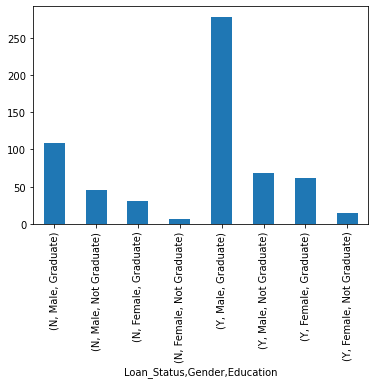

In [91]:
data.groupby('Loan_Status')[['Gender','Education']].value_counts().plot.bar()

- Most numner of loans are approved for Garduate males and females.

<AxesSubplot:xlabel='Loan_Status,Self_Employed'>

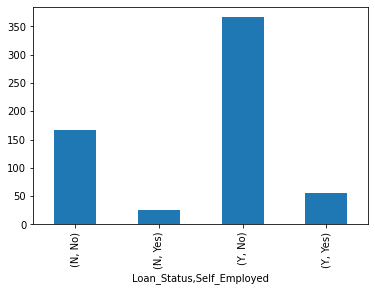

In [96]:
data.groupby('Loan_Status')[['Self_Employed']].value_counts().plot.bar()

- Most of the loan applicants who are not self-employed have their loans aproved.

<AxesSubplot:xlabel='Loan_Status,Gender,Credit_History'>

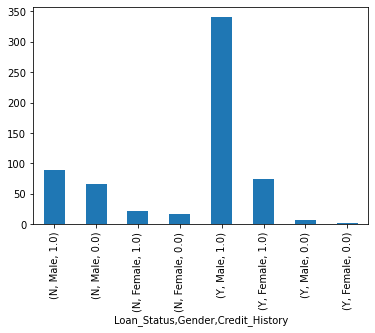

In [97]:
data.groupby('Loan_Status')[['Gender','Credit_History']].value_counts().plot.bar()

- Most Males that have credit history,their loans are approved, while same is for females.

<AxesSubplot:xlabel='Loan_Status,Gender,Property_Area'>

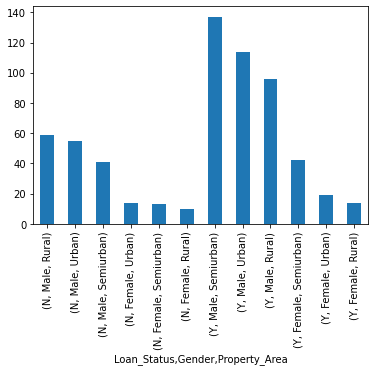

In [98]:
data.groupby('Loan_Status')[['Gender','Property_Area']].value_counts().plot.bar()

- Most males that have property area in Semiurban locality have their loans approved followed by Urban and Rural localities.
- Same trend is seen in females.

<AxesSubplot:xlabel='Loan_Status,Married,Dependents'>

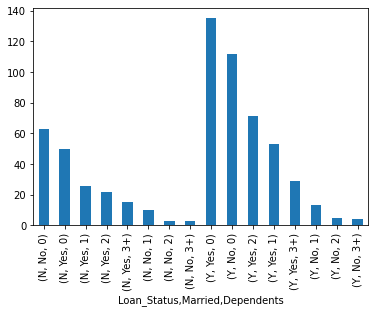

In [108]:
data.groupby('Loan_Status')[['Married','Dependents']].value_counts().plot.bar()

- It is seen from above plot that loan is approved for applicants who are married with 0 dependents.

<AxesSubplot:xlabel='Credit_History,Married,Self_Employed'>

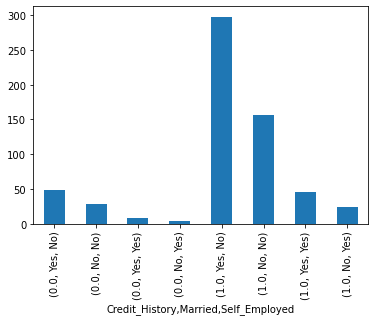

In [111]:
data.groupby('Credit_History')[['Married','Self_Employed']].value_counts().plot.bar()

-  Applicants having past credit history are mostly married and non self employed.

<AxesSubplot:xlabel='Credit_History,Married,Education'>

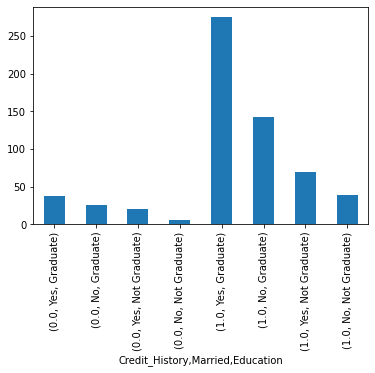

In [113]:
data.groupby('Credit_History')[['Married','Education']].value_counts().plot.bar()

- The applicants that has credit history are mostly married and graduates.

<AxesSubplot:xlabel='Loan_Status,Loan_Amount_Term,Credit_History'>

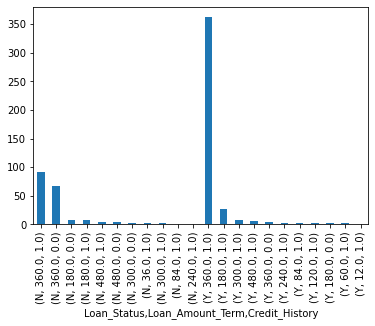

In [121]:

data.groupby('Loan_Status')[['Loan_Amount_Term','Credit_History']].value_counts().plot.bar()

- Most of the applicants who have credit history have chosen loan repayment for 360 months.

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- It can be seen from above that dependents column, though it has numerical values it shows datatype as object as one of the unique value is 3+.

 **Changing datatype and unique values from datatype to int and from 3+ to 3 respectively.**

In [273]:
#replacing 3+ to 3

data['Dependents']=data['Dependents'].replace('3+',3)

In [274]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [275]:
#changing datatype to int

data['Dependents']=data['Dependents'].astype('int')

In [276]:
#checking if datatype is changed

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


# Encoding the categorical columns using Label Encoder

In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
label_enc=LabelEncoder()

In [279]:
df1=label_enc.fit_transform(data['Gender'])
df2=label_enc.fit_transform(data['Married'])
df3=label_enc.fit_transform(data['Education'])
df4=label_enc.fit_transform(data['Self_Employed'])
df5=label_enc.fit_transform(data['Property_Area'])
df6=label_enc.fit_transform(data['Loan_Status'])


In [280]:
data['Gender']=df1
data['Married']=df2
data['Education']=df3
data['Self_Employed']=df4
data['Property_Area']=df5
data['Loan_Status']=df6

In [281]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Describing the dataset

In [144]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


- highest income of applicant can be seen is 81000 while lowest is 150, while average applicants income is 5403. looking at the interquantile values it can be seen that there are presence of outliers and presence of skewness.
- Skewness and presence of outliers can be seen after looking at interquantile ranges of Co-applicant Income, Loan Amount and Loan Amount term columns.

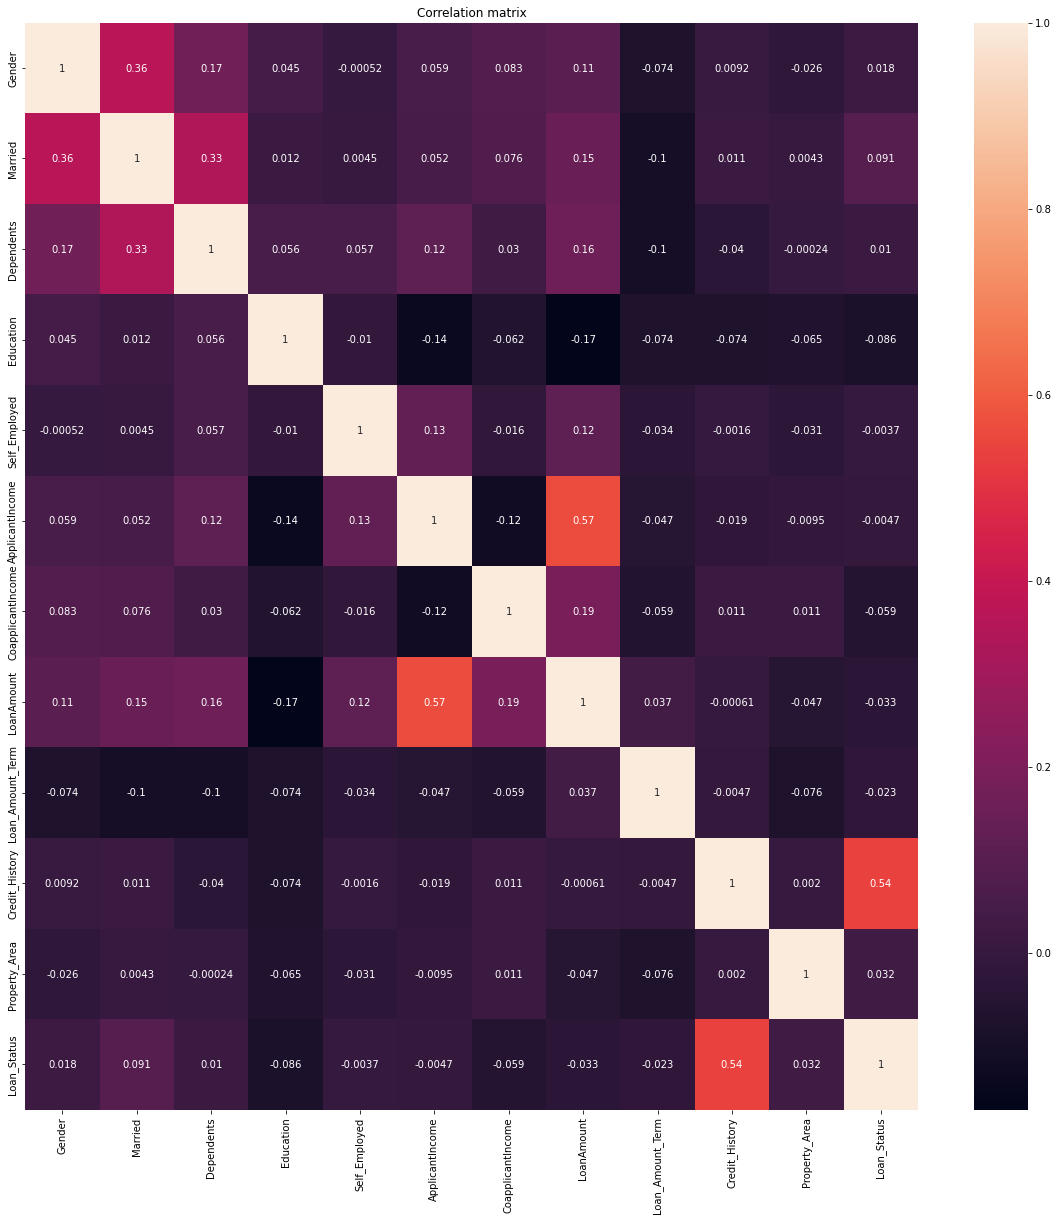

In [148]:
# plotting heatmap to check for collinearity

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

- There is no multicollinearity seen within the features.
- Highest positively related feature to Label(Loan_status) is Credit History i.e. for 54%
- There is 57% relationhip seen between Applicant Income and Loan Amount.

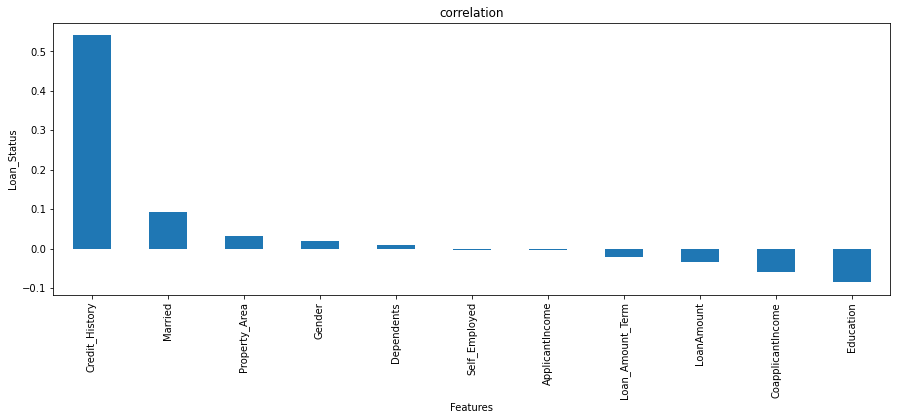

In [150]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Loan_Status')
plt.title('correlation')
plt.show()

- As said earlier credit history is highest positively related to label, while Education highest is negatively related to label.

# Outlier removal

In [282]:
features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

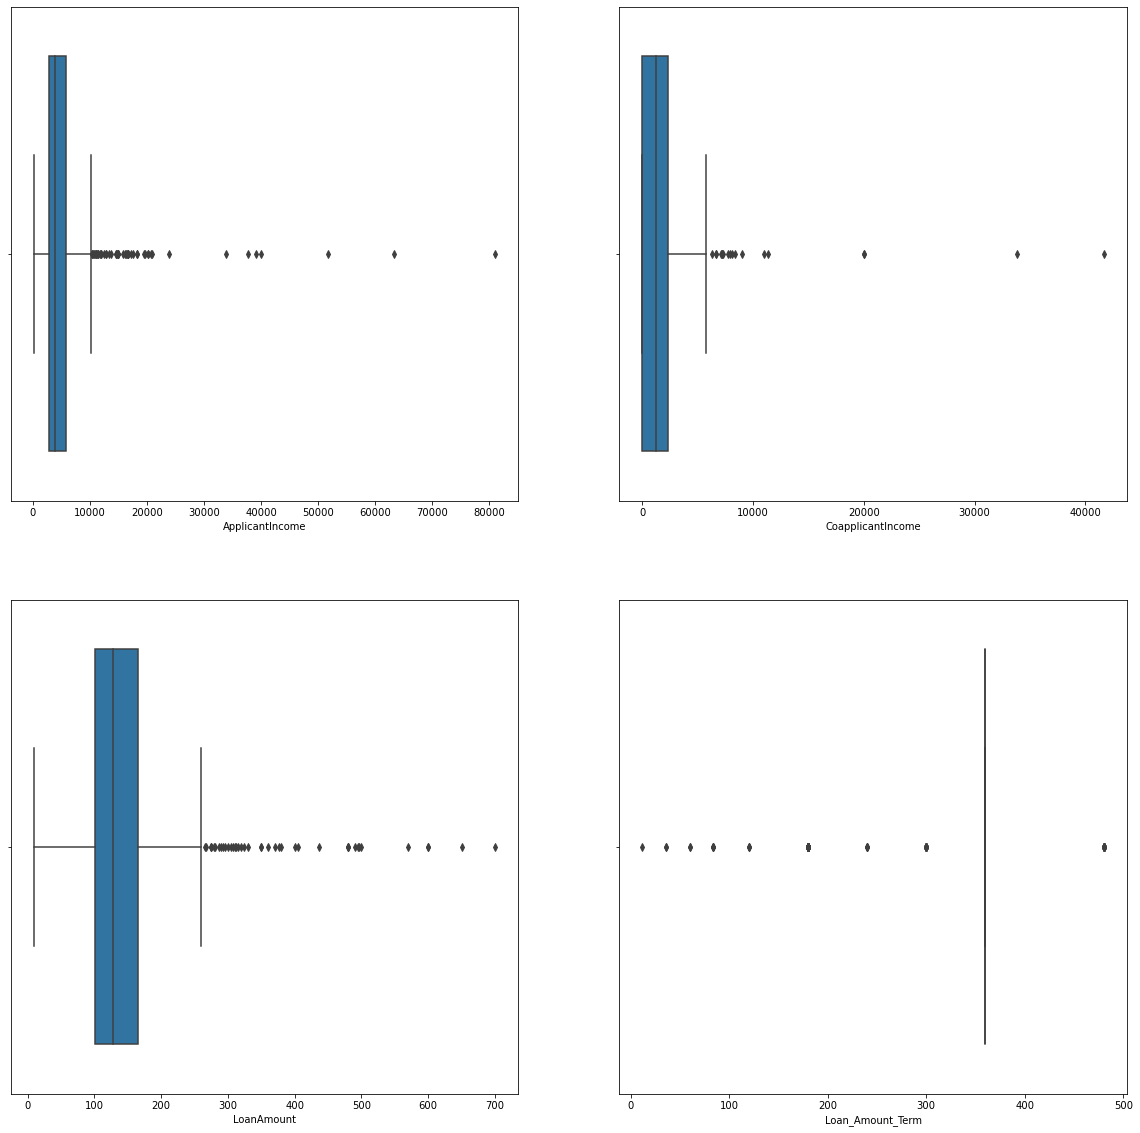

In [283]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- Looking at the above plots for continuous data, it is seen that there are presence of outliers

# Removing outliers using z-score method

In [284]:
#importing zscore library

from scipy.stats import zscore

In [285]:
#inputing continuous data 

z_score=zscore(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']])

In [286]:
abs_z_score=np.abs(z_score)

In [287]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [288]:
data=data[filtering_entry]

In [289]:
#dataset shape after removing outliers

data.shape

(577, 12)

# Data loss after removing outliers

In [290]:
# data loss percentage 

data_loss=((614-577)/577)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 6.412478336221837%


# Checking for skewness in dataset

In [291]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

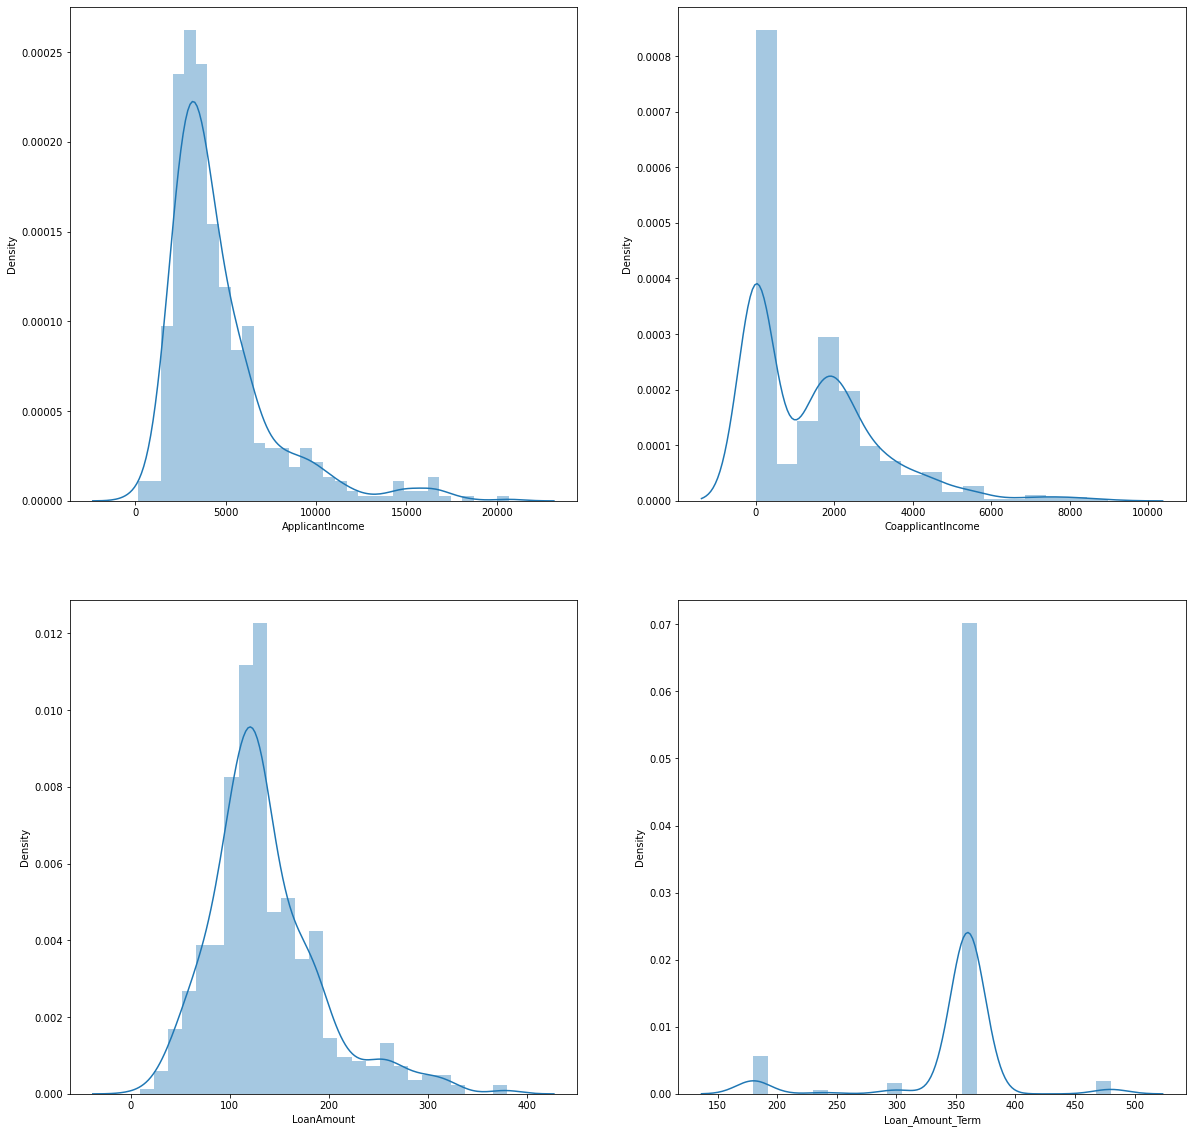

In [292]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- As seen above data is highly skewed for all 5 columns.

# Hence removing skewness using Power Transformer

In [293]:
features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

In [294]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [295]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [296]:
#printing features to check for skewness after
data[features].skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
dtype: float64

from above output it looks like skewness is lowered and is within +-0.5 range now

# Using feature selection to find best features that are related to better model building.

In [299]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [306]:
best_features=SelectKBest(score_func=f_classif,k=10)

In [307]:
fit=best_features.fit(x,y)

In [308]:
data_scores=pd.DataFrame(fit.scores_)

In [309]:
data_columns=pd.DataFrame(x.columns)

In [310]:
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']

In [312]:
print(feature_scores.nlargest(10,'Score'))

         Feature_Name       Score
9      Credit_History  263.985861
3           Education    4.979459
1             Married    4.593676
6   CoapplicantIncome    3.642819
8    Loan_Amount_Term    1.848621
4       Self_Employed    0.404840
10      Property_Area    0.404285
7          LoanAmount    0.320687
2          Dependents    0.183728
0              Gender    0.174308


- It can be seen that if I choose 10 features that are related to Label then Applicant_Income column drops out, which means according to system applicant's income is not related to approval of Loan. If we take this Logically then applicant's Income is the major factor for banks to grant anybody loan. For example, if a person is not working/earning very less compared to his loan amount, then banks wont provide him loans.
-  **This will be the sole reason I will not drop any columns from data and build a model taking all the columns into consideraton.**

In [314]:
#printing value counts in Loan_Status column

data['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

It can be seen from above output that more number of 1 data is present and less number of 0,
# Hence applying SMOTE to remove Oversampling

In [315]:
#splitting data into features and label

x=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [316]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.80)

In [317]:
x_new,y_new=sm.fit_resample(x,y)
print('The no. of classes before fit',format(Counter(y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({1: 398, 0: 179})
The no. of classes after fit Counter({1: 398, 0: 318})


In [318]:
#new data for label
y_new.value_counts()

1    398
0    318
Name: Loan_Status, dtype: int64

# Since power transformer was used on continuous columns which scales the data, hence data scaling is not done before model building.

# Model Buiding part

In [319]:
#Logistic Regression Model
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [320]:
#assigning variable to model
lr=LogisticRegression()

In [321]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    '\n'

training accuracy is  76.16387337057728  for random state  0
testing accuracy is  79.88826815642457  for random state  0
training accuracy is  75.97765363128491  for random state  1
testing accuracy is  74.86033519553072  for random state  1
training accuracy is  77.28119180633148  for random state  2
testing accuracy is  72.06703910614524  for random state  2
training accuracy is  77.6536312849162  for random state  3
testing accuracy is  73.18435754189943  for random state  3
training accuracy is  77.6536312849162  for random state  4
testing accuracy is  74.86033519553072  for random state  4
training accuracy is  76.53631284916202  for random state  5
testing accuracy is  77.6536312849162  for random state  5
training accuracy is  76.16387337057728  for random state  6
testing accuracy is  73.74301675977654  for random state  6
training accuracy is  79.3296089385475  for random state  7
testing accuracy is  68.15642458100558  for random state  7
training accuracy is  77.65363128491

**Taking random state as 22 for model building**

In [322]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=22)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred))

In [323]:
lr.fit(x_train,y_train)

LogisticRegression()

In [324]:
#passing the function
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:76.72%
-----Testing score-----
Accuracy score:75.42%
classification report 
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        74
           1       0.75      0.87      0.81       105

    accuracy                           0.75       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179

confusion matrix  [[44 30]
 [14 91]]
F1 Score  0.8053097345132745


In [325]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [327]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(lr,x_new,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  72.90502793296089
At cv:- 3
cross validation score:-  72.48631670241319
At cv:- 4
cross validation score:-  74.72067039106145
At cv:- 5
cross validation score:-  74.02583527583528
At cv:- 6
cross validation score:-  74.30905695611578
At cv:- 7
cross validation score:-  75.42492725245438
At cv:- 8
cross validation score:-  75.28870162297129
At cv:- 9
cross validation score:-  74.58509142053445
At cv:- 10
cross validation score:-  75.14084507042253
At cv:- 11
cross validation score:-  75.69400296673024


In [328]:
#cross validation score
print('Cross Validation Score for Logistic regression model :- ',((cross_val_score(lr,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for Logistic regression model :-  75.69400296673024


In [334]:
#plotting ROC Curve

#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [335]:
pred=lr.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.40540541 1.        ]
tpr [0.         0.86666667 1.        ]
threshold [2 1 0]


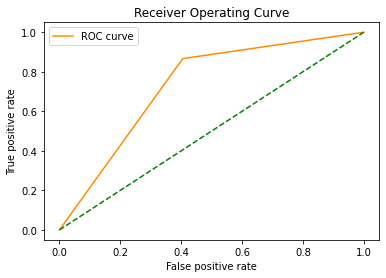

In [336]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# K Neighbours Classifier

In [329]:
#importing library

from sklearn.neighbors import KNeighborsClassifier

In [330]:
knn=KNeighborsClassifier()

In [331]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [332]:
#passing the function
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:83.05%
-----Testing score-----
Accuracy score:70.95%
classification report 
               precision    recall  f1-score   support

           0       0.65      0.64      0.64        74
           1       0.75      0.76      0.75       105

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.71      0.71       179

confusion matrix  [[47 27]
 [25 80]]
F1 Score  0.7547169811320754


In [342]:
#cross validation score
print('Cross Validation Score for K Neighbours Classifier model :- ',((cross_val_score(knn,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for K Neighbours Classifier model :-  74.1682559864378


In [337]:
# Plotting ROC Curve

pred=knn.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.36486486 1.        ]
tpr [0.         0.76190476 1.        ]
threshold [2 1 0]


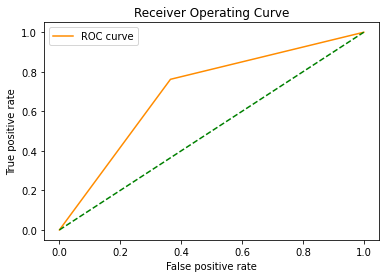

In [338]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Random Forests Classifier

In [339]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [340]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [341]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:83.24%
classification report 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        74
           1       0.84      0.88      0.86       105

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

confusion matrix  [[57 17]
 [13 92]]
F1 Score  0.8598130841121495


In [349]:
#cross validation score
print('Cross Validation Score for Random Forests Classifier model :- ',((cross_val_score(rf,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for Random Forests Classifier model :-  81.4261496079678


In [344]:
# Plotting ROC Curve

pred=rf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.22972973 1.        ]
tpr [0.         0.87619048 1.        ]
threshold [2 1 0]


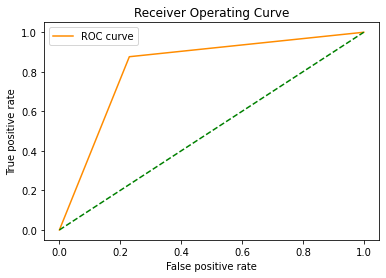

In [345]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# support vector classifier

In [346]:
#importing library
from sklearn.svm import SVC
svc=SVC()

In [347]:
#fitting model to dataset
svc.fit(x_train,y_train)

SVC()

In [348]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:80.45%
-----Testing score-----
Accuracy score:77.65%
classification report 
               precision    recall  f1-score   support

           0       0.80      0.61      0.69        74
           1       0.76      0.90      0.82       105

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

confusion matrix  [[45 29]
 [11 94]]
F1 Score  0.824561403508772


In [350]:
#cross validation score
print('Cross Validation Score for support vector classifier model :- ',((cross_val_score(svc,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for support vector classifier model :-  76.2534435261708


In [351]:
# Plotting ROC Curve

pred=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.39189189 1.        ]
tpr [0.        0.8952381 1.       ]
threshold [2 1 0]


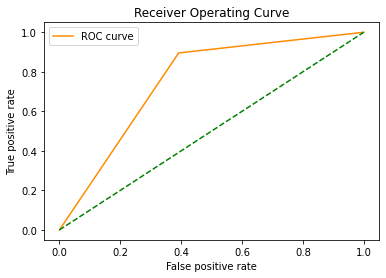

In [352]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

In [353]:
# AdaBoost Classifier

In [354]:
from sklearn.ensemble import AdaBoostClassifier

In [355]:
ab=AdaBoostClassifier()

In [356]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [357]:
#passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(ab,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:81.94%
-----Testing score-----
Accuracy score:73.74%
classification report 
               precision    recall  f1-score   support

           0       0.72      0.59      0.65        74
           1       0.75      0.84      0.79       105

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.73       179

confusion matrix  [[44 30]
 [17 88]]
F1 Score  0.789237668161435


In [358]:
#cross validation score
print('Cross Validation Score for Adaboost Classifier model :- ',((cross_val_score(ab,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for Adaboost Classifier model :-  74.5772409408773


In [359]:
# Plotting ROC Curve

pred=ab.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.40540541 1.        ]
tpr [0.         0.83809524 1.        ]
threshold [2 1 0]


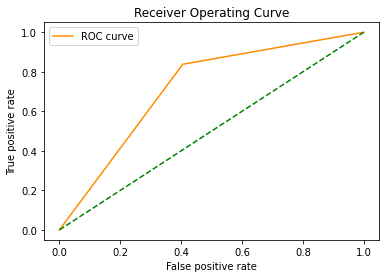

In [360]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Dataframe showing model_wise training & testing accuracy scores with cross validation scores

In [362]:
column=pd.DataFrame({'Model':['Logistic Regression','KNeigbours','Random Forests','SVC','Adaboost'],
                    'Training scores':[76.72,83.05,100,80.45,81.94],
                    'Testing scores':[75.42,70.95,83.24,77.65,73.74],
                    'Cross validation score':[75.69,75.47,81.42,76.25,74.57],
                    'F1 Scores':[80.53,74.16,85.98,82.45,78.92]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 Scores
0,Logistic Regression,76.72,75.42,75.69,80.53
1,KNeigbours,83.05,70.95,75.47,74.16
2,Random Forests,100.00,83.24,81.42,85.98
3,SVC,80.45,77.65,76.25,82.45
4,Adaboost,81.94,73.74,74.57,78.92


 Acoording to me Logistic regression is the best model as it has same training,testing and cross validation scores, though random forest has seen most of the data with better accuracy.
 # Performing hyperparameter tuning on Logistic Regression model.

In [364]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [374]:
grid_param=[{'penalty':['l1', 'l2', 'elasticnet', 'none'],
           'max_iter':[100,150,200,250,300],
           'fit_intercept':[True,False],
            'intercept_scaling':[1.5,2.0,2.5,3.0,3.5,4.0],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [375]:
#saving model in variable
grid=GridSearchCV(LogisticRegression(),param_grid=grid_param)

In [376]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'intercept_scaling': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
                          'max_iter': [100, 150, 200, 250, 300],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}])

In [377]:
#best parameters for tuning
grid.best_params_

{'fit_intercept': True,
 'intercept_scaling': 1.5,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [371]:
#using best parameters to train 
lr1=LogisticRegression(fit_intercept=True,
                           intercept_scaling=1.5,
                           max_iter=100,
                           penalty='l1',
                      solver='liblinear')

In [372]:
lr1.fit(x_train,y_train)

LogisticRegression(intercept_scaling=1.5, penalty='l1', solver='liblinear')

In [373]:
#passing the function
metric_score(lr1,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr1,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:76.72%
-----Testing score-----
Accuracy score:77.09%
classification report 
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        74
           1       0.76      0.90      0.82       105

    accuracy                           0.77       179
   macro avg       0.78      0.74      0.75       179
weighted avg       0.78      0.77      0.76       179

confusion matrix  [[44 30]
 [11 94]]
F1 Score  0.8209606986899562


In [378]:
#cross validation score
print('Cross Validation Score for tuned Linear Regression model :- ',((cross_val_score(lr1,x_new,y_new,cv=11).mean())*100))

Cross Validation Score for tuned Linear Regression model :-  75.55414282687009


In [379]:
#plotting ROC curve


pred=lr1.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.40540541 1.        ]
tpr [0.        0.8952381 1.       ]
threshold [2 1 0]


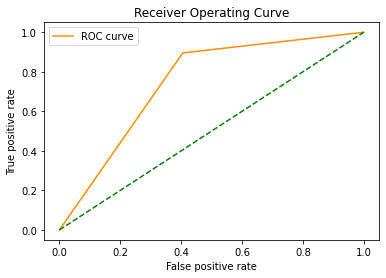

In [380]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

- The tuned model has lower training and higher testing accuracy hence according to me the best model is the original Linear Regression model as it has same train,testing and cross validation scores, hence saving that model.

- # Saving the model

In [381]:
import pickle

In [382]:
pickle.dump(lr1,open('Loan_status_lr','wb'))